# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [3]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [4]:
## parsing data here
images, labels = parse_data(df)


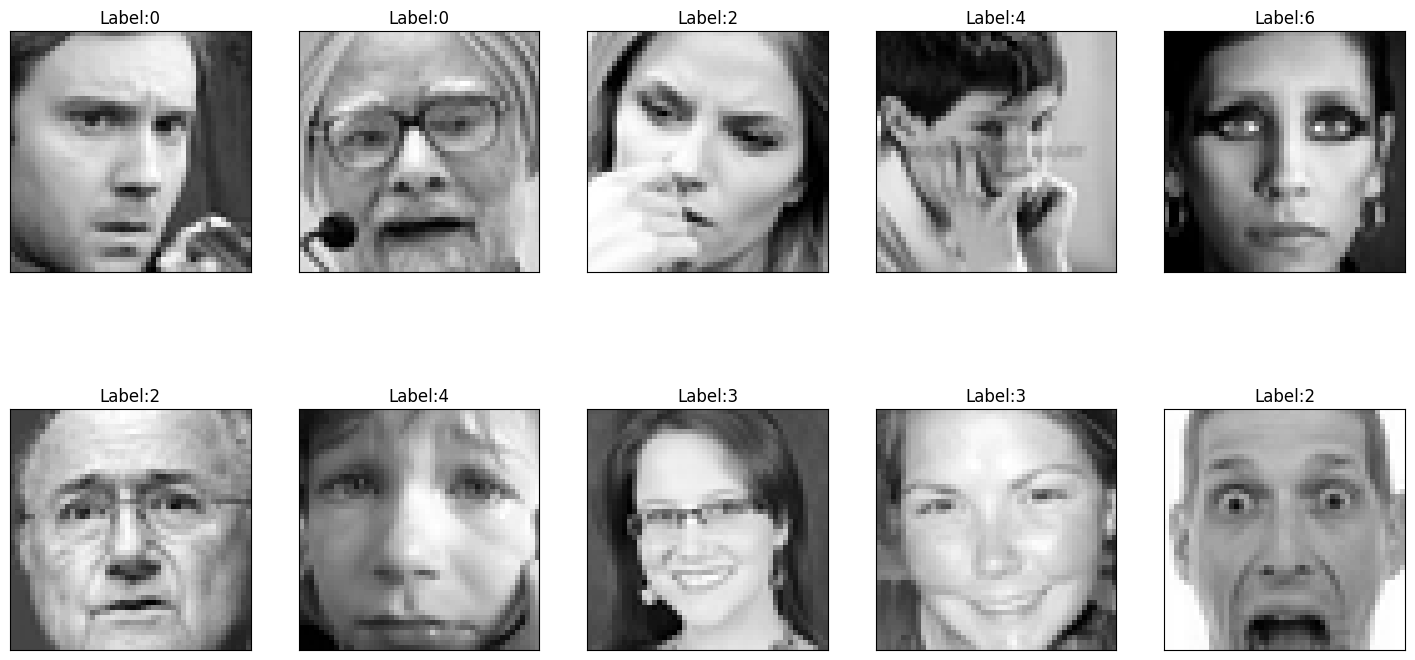

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
images_reshaped = images.reshape(images.shape[0], -1) ## modify images' array to the appropriate shape
pca.fit(images_reshaped)

PCA(n_components=2)

In [ ]:
images_reshaped.shape

(35887, 2304)

In [ ]:
## transform for visualizing here
images_pca=pca.transform(images_reshaped)
images_pca.shape

(35887, 2)

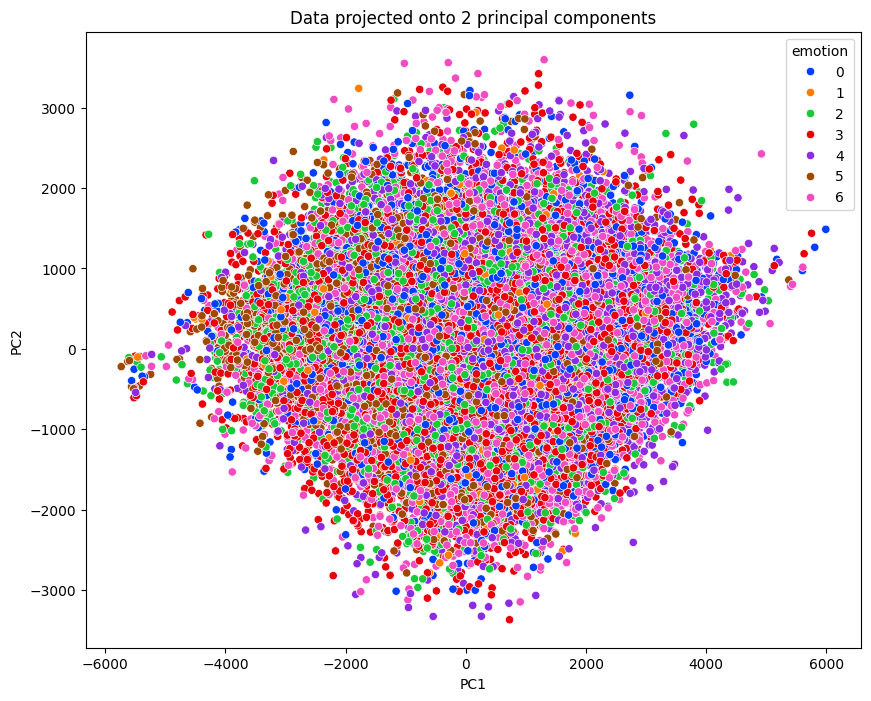

In [ ]:
import seaborn as sns
df_pca = pd.DataFrame(data=images_pca, columns=['PC1', 'PC2'])
df_pca['emotion'] = labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='emotion', palette='bright')
plt.title('Data projected onto 2 principal components')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

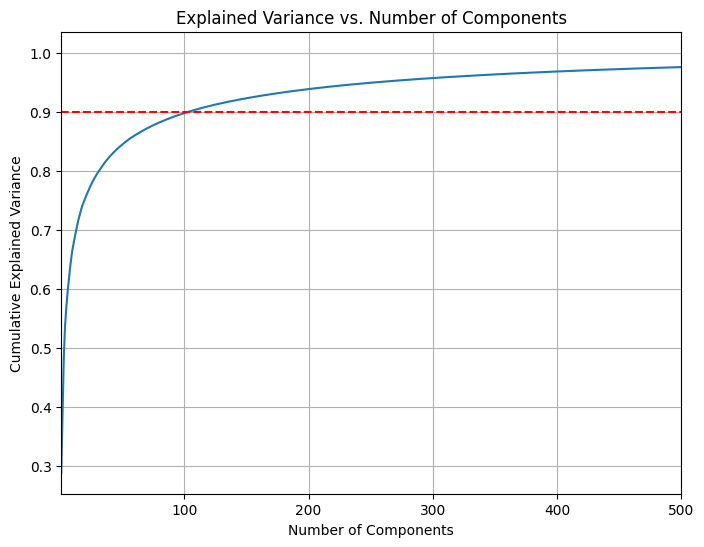

Số lượng principal components ở mức 90%: 104


In [ ]:
pca = PCA()
pca.fit(images_reshaped)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

# Chọn số lượng principal components dựa trên ngưỡng phương sai tích lũy
threshold_variance = 0.9 * cumulative_explained_variance[-1]  # 90% của tổng phương sai
n_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.grid(visible=True)
plt.axhline(y=threshold_variance, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.xlim(1, 500)
plt.show()

print("Số lượng principal components ở mức 90%:", n_components)

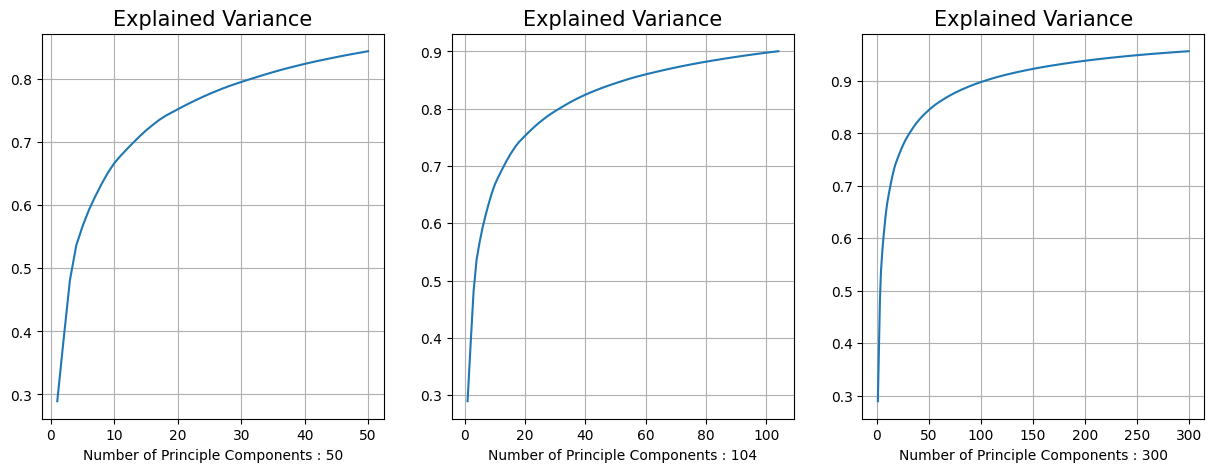

In [ ]:
def EV(n):
    pca = PCA(n_components=n, whiten=True)
    pca.fit(images_reshaped)
    #plot
    plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum())
    plt.title('Explained Variance',fontsize=15)
    plt.grid(visible=True)
    plt.xlabel('Number of Principle Components : {}'.format(n), fontsize=10)

# use the function above and try use n_component=50,104,and 300
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
EV(50)
plt.subplot(1,3,2)
EV(104)
plt.subplot(1,3,3)
EV(300)

As shown above, if we compress the inputs data into 104 dimensions, we still can obtain the most information from inputs data.

Nếu ta nén dữ liệu input thành 104 chiều, ta vẫn có thể thu được nhiều thông tin nhất từ ​​input.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [10]:
# import packages for training classifiers

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [11]:
# splitting data into train/val/test subsets here
from sklearn.model_selection import train_test_split

X = images_reshaped
y = labels

RANDOM_STATE = 1111
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=RANDOM_STATE)

In [12]:
# scale data and apply PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=104)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Logistic Regressions

In [13]:
# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000000)

# Define hyperparameters for grid search
param_grid= {
        'solver': ['lbfgs', 'liblinear','newton-cg', 'sag',],
        'penalty': ['l2']
    }

# grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=3)

In [17]:
# Perform grid search on original data
grid_search.fit(X_train, y_train)
print("\nOriginal data - Logistic Regression")
print("Best Parameters: ",grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Original data - Logistic Regression
Best Parameters:  {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.28      0.18      0.22      1458
           1       0.11      0.05      0.07       153
           2       0.24      0.16      0.19      1526
           3       0.47      0.66      0.55      2787
           4       0.30      0.29      0.29      1821
           5       0.49      0.48      0.48      1178
           6       0.33      0.33      0.33      1844

    accuracy                           0.38     10767
   macro avg       0.32      0.31      0.30     10767
weighted avg       0.35      0.38      0.36     10767



In [14]:
# Perform grid search on PCA-transformed data
grid_search.fit(X_train_pca, y_train)
print("\nPCA data - Logistic Regression")
print("Best Parameters: ",grid_search.best_params_)
y_pred = grid_search.predict(X_test_pca)
print(classification_report(y_test, y_pred))


PCA data - Logistic Regression
Best Parameters:  {'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.30      0.13      0.18      1458
           1       0.14      0.01      0.01       153
           2       0.23      0.09      0.13      1526
           3       0.44      0.73      0.55      2787
           4       0.29      0.29      0.29      1821
           5       0.46      0.48      0.47      1178
           6       0.33      0.33      0.33      1844

    accuracy                           0.38     10767
   macro avg       0.31      0.29      0.28     10767
weighted avg       0.34      0.38      0.34     10767



_**Assessment:**_

Việc giảm chiều dữ liệu bằng PCA không làm thay đổi đáng kể hiệu suất tổng thể của mô hình Logistic Regression, đồng thời giúp giảm thời gian huấn luyện mô hình. Tuy nhiên, nó có thể làm giảm hiệu suất của mô hình đối với một số lớp nhất định. 

### Naive Bayes

- Công thức tính phương sai trong mô hình:
$$ \sigma_{cj}^2 = \frac{1}{N_c - 1} \sum_{i=1}^{N} (x_{ij} - \mu_{cj})^2 $$
- Sử dụng siêu tham số var_smoothing để tránh việc phương sai bằng 0 dẫn đến vấn đề khi tính logarit của xác suất:  
$$ \sigma_{cj}^2 = \frac{1}{N_c - 1} \sum_{i=1}^{N} (x_{ij} - \mu_{cj})^2 + var\_smoothing $$


In [18]:
# Định nghĩa mô hình Naive Bayes
model = GaussianNB()
# Thiết lập lưới siêu tham số cho GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 100) #tạo ra 100 giá trị trong khoảng từ 10^-9 đến 10^0
}

#### 1. Xây dựng mô hình cho dữ liệu gốc images_reshaped

In [19]:
# Khởi tạo GridSearchCV với dữ liệu gốc
grid_search_ogn = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1) # Dữ liệu sẽ được chia thành 5 bằng nhau


In [20]:
# Huấn luyện mô hình
grid_search_ogn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-09, 1.23284674e-09, 1.51991108e-09, 1.87381742e-09,
       2.31012970e-09, 2.84803587e-09, 3.51119173e-09, 4.32876128e-09,
       5.33669923e-09, 6.57933225e-09, 8.11130831e-09, 1.00000000e-08,
       1.23284674e-08, 1.51991108e-08, 1.87381742e-08, 2.31012970e-08,
       2.84803587e-08, 3.5111917...
       8.11130831e-03, 1.00000000e-02, 1.23284674e-02, 1.51991108e-02,
       1.87381742e-02, 2.31012970e-02, 2.84803587e-02, 3.51119173e-02,
       4.32876128e-02, 5.33669923e-02, 6.57933225e-02, 8.11130831e-02,
       1.00000000e-01, 1.23284674e-01, 1.51991108e-01, 1.87381742e-01,
       2.31012970e-01, 2.84803587e-01, 3.51119173e-01, 4.32876128e-01,
       5.33669923e-01, 6.57933225e-01, 8.11130831e-01, 1.00000000e+00])},
             verbose=1)

In [21]:
# Lấy các tham số tốt nhất và mô hình tốt nhất
best_params_ogn = grid_search_ogn.best_params_
best_model_ogn = grid_search_ogn.best_estimator_
# Dự đoán trên tập kiểm tra
y_pred_ogn = best_model_ogn.predict(X_test)

In [22]:
print("Tham số tốt nhất tìm thấy: ", best_params_ogn)
print("Các thông số hiệu suất: \n", classification_report(y_test, y_pred_ogn))

Tham số tốt nhất tìm thấy:  {'var_smoothing': 0.0008111308307896872}
Các thông số hiệu suất: 
               precision    recall  f1-score   support

           0       0.21      0.05      0.08       996
           1       0.02      0.20      0.03        98
           2       0.19      0.05      0.08      1022
           3       0.41      0.13      0.19      1859
           4       0.24      0.40      0.30      1184
           5       0.20      0.59      0.30       790
           6       0.26      0.15      0.19      1229

    accuracy                           0.21      7178
   macro avg       0.22      0.22      0.17      7178
weighted avg       0.27      0.21      0.19      7178



#### 2. Xây dựng model cho dữ liêu PCA

In [23]:
# Khởi tạo GridSearchCV
grid_search_pca = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [24]:
# Huấn luyện mô hình
grid_search_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-09, 1.23284674e-09, 1.51991108e-09, 1.87381742e-09,
       2.31012970e-09, 2.84803587e-09, 3.51119173e-09, 4.32876128e-09,
       5.33669923e-09, 6.57933225e-09, 8.11130831e-09, 1.00000000e-08,
       1.23284674e-08, 1.51991108e-08, 1.87381742e-08, 2.31012970e-08,
       2.84803587e-08, 3.5111917...
       8.11130831e-03, 1.00000000e-02, 1.23284674e-02, 1.51991108e-02,
       1.87381742e-02, 2.31012970e-02, 2.84803587e-02, 3.51119173e-02,
       4.32876128e-02, 5.33669923e-02, 6.57933225e-02, 8.11130831e-02,
       1.00000000e-01, 1.23284674e-01, 1.51991108e-01, 1.87381742e-01,
       2.31012970e-01, 2.84803587e-01, 3.51119173e-01, 4.32876128e-01,
       5.33669923e-01, 6.57933225e-01, 8.11130831e-01, 1.00000000e+00])},
             verbose=1)

In [26]:
# Lấy các tham số tốt nhất và mô hình tốt nhất
best_params_pca = grid_search_pca.best_params_
best_model_pca = grid_search_pca.best_estimator_
# Dự đoán trên tập kiểm tra
y_pred_pca = best_model_pca.predict(X_test_pca)

In [27]:
print("Tham số tốt nhất tìm thấy: ", best_params_pca)
print("Các thông số hiệu suất: \n", classification_report(y_test, y_pred_pca))

Tham số tốt nhất tìm thấy:  {'var_smoothing': 0.004328761281083062}
Các thông số hiệu suất: 
               precision    recall  f1-score   support

           0       0.32      0.05      0.09       996
           1       0.15      0.16      0.16        98
           2       0.21      0.04      0.06      1022
           3       0.37      0.74      0.50      1859
           4       0.29      0.18      0.22      1184
           5       0.54      0.32      0.41       790
           6       0.28      0.43      0.34      1229

    accuracy                           0.34      7178
   macro avg       0.31      0.27      0.25      7178
weighted avg       0.33      0.34      0.29      7178



_**Assessment:**_

Đối với Naive Bayes, mô hình huấn luyện với PCA data giúp cải thiện độ chính xác và các thông số precision, recall, và f1-score, cho thấy mô hình hoạt động tốt hơn sau khi giảm chiều dữ liệu.

### Random Forest

In [19]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]

}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

#### Apply Random Forest on original data

In [1]:
# Perform a grid search to find the best hyperparameters on original data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END bootstrap=True, max_features=sqrt, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_features=sqrt, n_estimators=200; total time= 2.7min
[CV] END bootstrap=True, max_features=log2, n_estimators=200; total time=  41.2s
[CV] END bootstrap=False, max_features=sqrt, n_estimators=100; total time= 2.0min
[CV] END bootstrap=False, max_features=sqrt, n_estimators=200; total time= 4.0min
[CV] END .bootstrap=True, max_features=sqrt, n_estimators=50; total time=  39.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=100; total time= 1.3min
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  10.2s
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  10.3s
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  10.9s
[CV] END bootstrap=True, max_features=log2, n_estimators=100; total time=  20.5s
[CV] END bootstrap=True, max_features=log2, n_

In [20]:
grid_search.fit(X_train, y_train)
# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict with the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters:  {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score:  0.44249823071479116
Test Accuracy:  0.47682734280672423
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.20      0.29      1458
           1       0.93      0.25      0.40       153
           2       0.46      0.27      0.34      1526
           3       0.48      0.79      0.60      2787
           4       0.38      0.40      0.39      1821
           5       0.67      0.58      0.63      1178
           6       0.44      0.43      0.43      1844

    accuracy                           0.48     10767
   macro avg       0.56      0.42      0.44     10767
weighted avg       0.49      0.48      0.46     10767


#### Apply Random Forest on PCA data

In [2]:
# Perform a grid search to find the best hyperparameters on PCA data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END bootstrap=True, max_features=sqrt, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_features=sqrt, n_estimators=200; total time= 2.7min
[CV] END bootstrap=True, max_features=log2, n_estimators=200; total time=  41.6s
[CV] END bootstrap=False, max_features=sqrt, n_estimators=100; total time= 2.0min
[CV] END bootstrap=False, max_features=sqrt, n_estimators=200; total time= 3.9min
[CV] END .bootstrap=True, max_features=sqrt, n_estimators=50; total time=  39.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=100; total time= 1.3min
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  10.8s
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  11.6s
[CV] END .bootstrap=True, max_features=log2, n_estimators=50; total time=  10.7s
[CV] END bootstrap=True, max_features=log2, n_estimators=100; total time=  20.9s
[CV] END bootstrap=True, max_features=log2, n_

In [24]:
# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict with the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

# Evaluate the model
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters:  {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score:  0.44249823071479116
Test Accuracy:  0.47682734280672423
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.20      0.29      1458
           1       0.93      0.25      0.40       153
           2       0.46      0.27      0.34      1526
           3       0.48      0.79      0.60      2787
           4       0.38      0.40      0.39      1821
           5       0.67      0.58      0.63      1178
           6       0.44      0.43      0.43      1844

    accuracy                           0.48     10767
   macro avg       0.56      0.42      0.44     10767
weighted avg       0.49      0.48      0.46     10767


**_Assessment_**

The Random Forest model's accuracy does not change when using PCA. The precision, recall, and F1-score values for each label do not change between the two models. This indicates that PCA has preserved enough information for the model to perform as effectively as with the original data.

The macro and weighted average values also do not change, confirming that the overall performance of the model is not affected by dimensionality reduction.

Unchanged performance: The fact that there is no change in evaluation metrics (precision, recall, F1-score, accuracy) when applying PCA indicates that the principal components have retained sufficient information for the model to perform equivalently to using the original data. This typically occurs when the original data has many redundant dimensions and PCA can remove less informative dimensions without affecting the model's performance.

### MLP

In [ ]:
# param grid cho mô hình MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['logistic', 'relu'],
    'learning_rate': ['constant'],
    'batch_size': [32, 64],
    'max_iter': [200]
}

model = MLPClassifier()

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)

In [ ]:
# Train mô hình MLP sử dụng GridSearchCV với dataset gốc
grid_search.fit(X_train, y_train)
print("MLP with original dataset")
# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Đánh giá mô hình với tham số tốt nhất
print(classification_report(y_test, grid_search.predict(X_test)))

MLP with original dataset
Best parameters found:  {'activation': 'relu', 'batch_size': 64, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.29      0.31      0.30       996
           1       0.31      0.27      0.28        98
           2       0.33      0.30      0.31      1022
           3       0.56      0.57      0.57      1859
           4       0.31      0.31      0.31      1184
           5       0.52      0.55      0.53       790
           6       0.35      0.36      0.35      1229

    accuracy                           0.41      7178
   macro avg       0.38      0.38      0.38      7178
weighted avg       0.41      0.41      0.41      7178



In [ ]:
# Train mô hình MLP sử dụng GridSearchCV với pca dataset
grid_search.fit(X_train_pca, y_train)
print("MLP with PCA dataset")
# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Đánh giá mô hình với tham số tốt nhất
print(classification_report(y_test, grid_search.predict(X_test_pca)))

MLP with PCA dataset
Best parameters found:  {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       996
           1       0.19      0.28      0.23        98
           2       0.31      0.31      0.31      1022
           3       0.55      0.53      0.54      1859
           4       0.30      0.29      0.30      1184
           5       0.50      0.53      0.51       790
           6       0.35      0.36      0.35      1229

    accuracy                           0.39      7178
   macro avg       0.36      0.37      0.36      7178
weighted avg       0.39      0.39      0.39      7178



**_Assessment:_**

The MLP model trained on the original data performs slightly better than the model trained on PCA-transformed data. The difference in performance between the two models is insignificant. Dimensionality reduction using PCA does not significantly decrease the model's performance, however, in this case, it helps reduce the model's training time.

Since the dataset has an imbalanced number of samples between classes, we use Weighted Avg for comparison to get a more accurate assessment of the overall performance of the model.
| Algorithms | Data | Precision | Recall | F1-score | Accuracy |
|---|---|---|---|---|---|
| Logistic Regression | Original | 0.35 | 0.38 | 0.36 | 0.38 |
| Logistic Regression | PCA-transformed | 0.34 | 0.38 | 0.34 | 0.38 |
| Naive Bayes | Original | 0.27 | 0.21 | 0.19 | 0.21 |
| Naive Bayes | PCA-transformed | 0.33 | 0.34 | 0.29 | 0.34 |
| Random Forest | Original | 0.49 | 0.48 | 0.46 | 0.48 |
| Random Forest | PCA-transformed | 0.49 | 0.48 | 0.46 | 0.48 |
| MLP | Original | 0.41 | 0.41 | 0.41 | 0.41 |
| MLP | PCA-transformed | 0.39 | 0.39 | 0.39 | 0.39 |

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



Based on models' results with PCA-transformed data we obtain:
| Model               | Acuracy | Macro Avg. Precision | Macro Avg. Recall | Macro Avg. F1-Score | Weighted Avg. F1-Score |
|---------------------|---------|----------------------|-------------------|---------------------|------------------------|
| Logistic Regression | 0.38    | 0.31                 | 0.29              | 0.28                | 0.34                   |
| Naive Bayes         | 0.34    | 0.31                 | 0.27              | 0.25                | 0.29                   |
| Random Forest       | 0.48    | 0.56                 | 0.42              | 0.44                | 0.46                   |
| MLP                 | 0.39    | 0.38                 | 0.38              | 0.38                | 0.41                   |

**Model Performance Analysis**

* **Random Forest:** Clearly emerges as the best-performing model based on all metrics except for macro-averaged precision. Its accuracy (0.48) is notably higher than other models. It also strikes a good balance between precision and recall, as evidenced by its F1-scores.

* **MLP:** Performs reasonably well, particularly on the macro-averaged metrics. This suggests it's less biased towards the majority class compared to other models.

* **Logistic Regression and Naive Bayes:** Both models struggle with the task, exhibiting lower accuracy and generally weaker performance across other metrics.

**Emotion Category Performance**

Let's focus on the Random Forest model (the best performer) and analyze its strengths and weaknesses per emotion category:

* **Most Accurate:**
Category 3 (Happiness): The model achieves the highest recall (0.79) and F1-score (0.60), indicating it's very good at correctly identifying instances of happiness and not missing many true positive cases.
* **Most Errors:**
Category 0 (Angry) and Category 2 (Fear): The model exhibits the lowest precision and recall values for these emotions. This means it struggles to distinguish these emotions from others and often misclassifies them.

**Why Random Forest Performs Best**

Random Forest models are inherently good at handling complex classification tasks due to several reasons:

* **Ensemble Learning:** They combine the predictions of multiple decision trees, reducing overfitting and improving generalization.
* **Feature Importance:** They can identify the most important features for classification, potentially revealing insights about the data.
* **Robustness to Noise:** They are less sensitive to outliers and noisy data compared to some other algorithms.